In [5]:
import numpy as np
from crystfelparser.crystfelparser import stream_to_dictionary
from scipy.stats import pearsonr

In [6]:
def loadhkldict(hklfile):
    """Load an hkl file from crystfel into a dictionary

    Args:
        hklfile (str): path to hkl file

    Returns:
        dict: Dictionary hashed with the hkl triplets (as tuple)
    """    
    # read the file
    testjkl = open(hklfile,'r').read()
    # split the file in lines and get only the rows with 7 columns
    # also remove the header
    strhkl=[line for line in testjkl.strip().split("\n") if len(line.split())==7][1:]
    # remove the phase column
    strnumbrs=np.array([line.split() for line in strhkl])[:,[0,1,2,3,5,6]].astype(float)
    
    # create the dictionary
    return {tuple(hklline[:3].astype(int)):hklline[3:] for hklline in strnumbrs}

In [7]:
def loadhkldict_ref(hklfile):
    """Load an refernece hkl file from mtz-converted into a dictionary

    Args:
        hklfile (str): path to hkl file

    Returns:
        dict: Dictionary hashed with the hkl triplets (as tuple)
    """    
    # read the file
    testhkl = open(hklfile,'r').read()
    # split the file in lines and get only the rows with 7 columns
    # also remove the header
    strhkl=[line for line in testhkl.strip().split("\n") if len(line.split())==6][1:]
    strnumbrs=np.array([line.split() for line in strhkl])[:,[0,1,2,3,5]].astype(float)
    
    # create the dictionary
    return {tuple(hklline[:3].astype(int)):hklline[3:] for hklline in strnumbrs}

In [18]:
def loadhkldict_pdb(hklfile):
    """Load an refernece hkl file from mtz-converted into a dictionary

    Args:
        hklfile (str): path to hkl file

    Returns:
        dict: Dictionary hashed with the hkl triplets (as tuple)
    """    
    # read the file
    testhkl = open(hklfile,'r').read()
    # split the file in lines and get only the rows with 7 columns
    # also remove the header
    strhkl=[line for line in testhkl.strip().split("\n") if len(line.split())==5][1:]
    strnumbrs=np.array([line.split() for line in strhkl])[:,[0,1,2,3]].astype(float)
    
    # create the dictionary
    return {tuple(hklline[:3].astype(int)):hklline[3:] for hklline in strnumbrs}

## Load the stream file into a dictionary

In [152]:
# streamfile path
# load the streamfile into a dictionary 
# check what frames are indexable and save the indeces into a vector
#LYSO
streamfile_lyso="/das/work/p19/p19607/FromGreta/REDML_indx_data/lyso/processing/Lyso_12p4keV_1kHz_150mm_run000026_data_000010.th6.snr4.0.mpixco1.stream"
parsed_lyso=stream_to_dictionary(streamfile_lyso)
indexableframes_lyso=np.array(sorted([FR for FR in parsed_lyso.keys() if len(parsed_lyso[FR].keys())>7]))
#ECH
streamfile_ech="/das/work/p19/p19607/FromGreta/REDML_indx_data/ech/processing/ECH_12p4keV_2kHz_real_dark_150mm_run000076_data_000041.th5.snr4.0.mpixco1.ambi.stream"
parsed_ech=stream_to_dictionary(streamfile_ech)
indexableframes_ech=np.array(sorted([FR for FR in parsed_ech.keys() if len(parsed_ech[FR].keys())>7]))
#OCP
streamfile_ocp="/das/work/p19/p19607/FromGreta/REDML_indx_data/ocp/processing/OCP_12p4keV_100Hz_real_dark_150mm_run000047_data_000030.th5.snr4.0.mpixco1.ambi.stream"
parsed_ocp=stream_to_dictionary(streamfile_ocp)
indexableframes_ocp=np.array(sorted([FR for FR in parsed_ocp.keys() if len(parsed_ocp[FR].keys())>7]))
#OCP LB
streamfile_ocpLB="/das/work/p19/p19607/FromGreta/REDML_indx_data_pgprocess/ocp/OCP_LB_MULTI.ambi.stream"
parsed_ocpLB=stream_to_dictionary(streamfile_ocpLB)
indexableframes_ocpLB=np.array(sorted([FR for FR in parsed_ocpLB.keys() if len(parsed_ocpLB[FR].keys())>7]))
#OCP G
streamfile_ocpG="/das/work/p19/p19607/FromGreta/REDML_indx_data_pgprocess/ocp/OCP_Greta_MULTI.ambi.stream"
parsed_ocpG=stream_to_dictionary(streamfile_ocpG)
indexableframes_ocpG=np.array(sorted([FR for FR in parsed_ocpG.keys() if len(parsed_ocpG[FR].keys())>7]))


## How many indexable frames?

In [4]:
"{:.1f}%".format(len(indexableframes)/len(parsed)*100)

'12.7%'

## Load the hkl file into a dictionary

In [186]:
#LYSO
hklfile1="/das/work/p19/p19607/FromGreta/REDML_indx_data/lyso/processing/lyso.hkl"
hklfilea= "/das/work/p19/p19607/FromGreta/REDML_indx_data/lyso/reference/test_cc/lyso_all.hkl"
hklfile2="/das/work/p19/p19607/FromGreta/REDML_indx_data/lyso/reference/1hel.pdb_1.5A.hkl"
hklfile3="/das/work/p19/p19607/FromGreta/REDML_indx_data/lyso/reference/1hel_m2v.hkl"
hkldict1=loadhkldict(hklfile1)
hkldicta=loadhkldict(hklfilea)
hkldict2=loadhkldict_pdb(hklfile2)
hkldict3=loadhkldict_ref(hklfile3)
#ECH
hklfile4="/das/work/p19/p19607/FromGreta/REDML_indx_data/ech/processing/ech.hkl"
hklfile5="/das/work/p19/p19607/FromGreta/REDML_indx_data/ech/reference/4xb5.pdb_1.5A.hkl"
hklfile6="/das/work/p19/p19607/FromGreta/REDML_indx_data/ech/reference/4xb5_m2v.hkl"
hkldict4=loadhkldict(hklfile4)
hkldict5=loadhkldict_pdb(hklfile5)
hkldict6=loadhkldict_ref(hklfile6)
#OCP
hklfile7="/das/work/p19/p19607/FromGreta/REDML_indx_data/ocp/processing/ocp.hkl"
hklfile8="/das/work/p19/p19607/FromGreta/REDML_indx_data/ech/reference/4xb5.pdb_1.5A.hkl"
hklfile9="/das/work/p19/p19607/FromGreta/REDML_indx_data/ech/reference/4xb5_m2v.hkl"
hkldict7=loadhkldict(hklfile7)
hkldict8=loadhkldict_pdb(hklfile8)
hkldict9=loadhkldict_ref(hklfile9)


#### How many unique reflections are there?

In [28]:
len(hkldict.keys())

8464

#### Check the ratio of reflections in the stream that are contained in the hkl file
#### Multiplicity?

In [19]:
listrefl=[]
for indexableframe in indexableframes:
    Checkreflections=parsed[indexableframe]['predicted_reflections'][:,-3:].astype(int)
    tuplelist=map(tuple,Checkreflections)
    for millertuple in tuplelist:
        listrefl.append(millertuple)
setrefl=set(listrefl)
len(setrefl)/len(hkldict.keys())

9.636932892249527

In [178]:
def correlate_ints_hkls(hklfile1,hklfile2,thr=10):
    """ Compute correlation coeff. between 2 hkl files, only common reflections are used. 

    Arguments: hklfile 1 , hklfile2  as dictionary of the parsed hklfiles 
    the , threhold set to 10 minimum common reflections 
    """
    keys2=[]
    keys1=[]
    from scipy.stats import pearsonr
    #get all hkls from hklfile2
    for hkl2 in  hklfile2:
        keys2.append(tuple(hkl2))
    #get all hkls fomr hklfile1
    for hkl1 in  hklfile1:
        keys1.append(tuple(hkl1))
    
    #get the intensity from hklfile1 matching hkls from hklfile2
    hklintensity1=np.array([hklfile1[tuple(hkl)][0].astype(float) for hkl in keys2 if tuple(hkl) in hklfile1.keys()])
    #get the intensity from hklfile2 matching hkls from hklfile1
    hklintensity2=np.array([hklfile2[tuple(hkl)][0].astype(float) for hkl in keys1 if tuple(hkl) in hklfile2.keys()])
    
    
    
    print(hklintensity1[0])
    
    
    #calc correlations
    corr =pearsonr(hklintensity1,hklintensity2)[0]
    return corr

In [187]:
corr= correlate_ints_hkls (hkldict1,hkldicta)
print(corr)

0.12
0.895602125451412


In [20]:
def correlate_intensities(FR,parsedstream,hkldict,thr=3):
    """Compute the Pearson correlation coefficient for a specific indexed frame

    Args:
        FR (int): number of the indexed frame
        parsedstream (dict): dictionary of the parsed stream
        hkldict (dict): dictionary of the hkl target file
        thr (int, optional): Minimum matching pairs for computing the correlation. Defaults to 3.

    Returns:
        corrcoeff: Pearson correlation coefficient
        num_matched_reflections: number of matched reflections
    """    
    from scipy.stats import pearsonr
    # get the intensity of the matched target reflections from the hkl file
    hklintensity=np.array([hkldict[tuple(hkl)][0] for hkl in parsedstream[FR]['predicted_reflections'][:,-3:].astype(int) if tuple(hkl) in hkldict.keys()])
    # get the intensity of the matched target reflections from the stream file
    streamintensity=np.array([hkl[2] for hkl in parsedstream[FR]['predicted_reflections'] if tuple(hkl[-3:].astype(int)) in hkldict.keys()])
    # get the reflections miller indeces
    #hkllabels=np.array([tuple(hkl) for hkl in parsedstream[FR]['predicted_reflections'][:,-3:].astype(int) if tuple(hkl) in hkldict.keys()])
    if len(streamintensity)>thr:
        # compute the correlation
        corrcoeff=pearsonr(hklintensity,streamintensity)[0]
        return corrcoeff,len(streamintensity)
    else:
        return None

## Get the correlations

In [156]:
# first column: pearson correlation coeff
# second column: number of matching reflections
#LYSO
tcorr1=np.array([np.array(correlate_intensities(FR,parsed_lyso,hkldict1)) for FR in indexableframes_lyso if correlate_intensities(FR,parsed_lyso,hkldict1) is not None])
tcorr2=np.array([np.array(correlate_intensities(FR,parsed_lyso,hkldict2)) for FR in indexableframes_lyso if correlate_intensities(FR,parsed_lyso,hkldict2) is not None])
tcorr3=np.array([np.array(correlate_intensities(FR,parsed_lyso,hkldict3)) for FR in indexableframes_lyso if correlate_intensities(FR,parsed_lyso,hkldict3) is not None])
#ECH
tcorr4=np.array([np.array(correlate_intensities(FR,parsed_ech,hkldict4)) for FR in indexableframes_ech if correlate_intensities(FR,parsed_ech,hkldict4) is not None])
tcorr5=np.array([np.array(correlate_intensities(FR,parsed_ech,hkldict5)) for FR in indexableframes_ech if correlate_intensities(FR,parsed_ech,hkldict5) is not None])
tcorr6=np.array([np.array(correlate_intensities(FR,parsed_ech,hkldict6)) for FR in indexableframes_ech if correlate_intensities(FR,parsed_ech,hkldict6) is not None])
#OCP
tcorr7=np.array([np.array(correlate_intensities(FR,parsed_ocp,hkldict7)) for FR in indexableframes_ocp if correlate_intensities(FR,parsed_ocp,hkldict7) is not None])
tcorr8=np.array([np.array(correlate_intensities(FR,parsed_ocp,hkldict8)) for FR in indexableframes_ocp if correlate_intensities(FR,parsed_ocp,hkldict8) is not None])
tcorr9=np.array([np.array(correlate_intensities(FR,parsed_ocp,hkldict9)) for FR in indexableframes_ocp if correlate_intensities(FR,parsed_ocp,hkldict9) is not None])
#OCP LB
tcorr10=np.array([np.array(correlate_intensities(FR,parsed_ocpLB,hkldict7)) for FR in indexableframes_ocpLB if correlate_intensities(FR,parsed_ocpLB,hkldict7) is not None])
#OCP G
tcorr11=np.array([np.array(correlate_intensities(FR,parsed_ocpG,hkldict7)) for FR in indexableframes_ocpG if correlate_intensities(FR,parsed_ocpG,hkldict7) is not None])

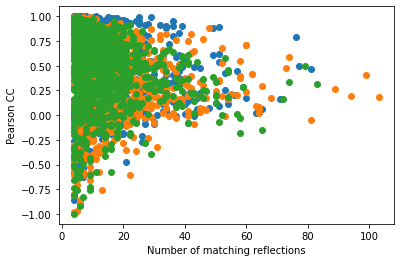

In [39]:
import matplotlib.pyplot as plt

_=plt.scatter(tcorr1[:,1],tcorr1[:,0])#,c=clbspf)
_=plt.scatter(tcorr2[:,1],tcorr2[:,0])#,c=clbspf)
_=plt.scatter(tcorr3[:,1],tcorr3[:,0])#,c=clbspf)
_=plt.xlabel("Number of matching reflections")
_=plt.ylabel("Pearson CC")

## Plot the distribution of CCs

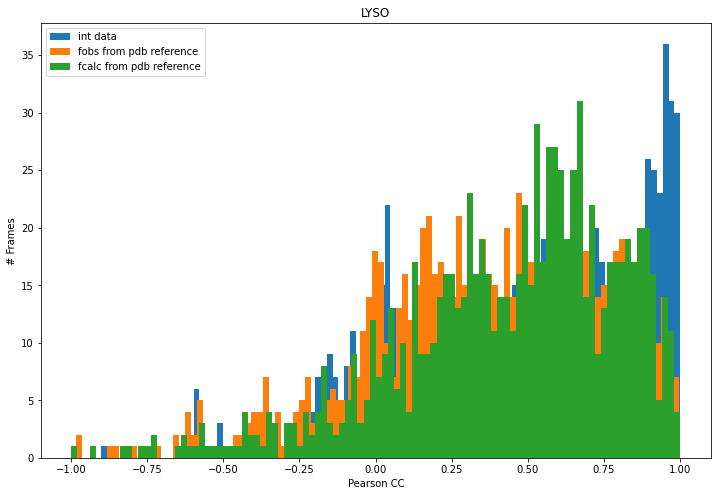

In [124]:
###LYSO DATA 
_=plt.figure()
_.set_figwidth(12)
_.set_figheight(8)
_=plt.hist(tcorr1[:,0],bins=100,histtype="stepfilled", label="int data")
_=plt.hist(tcorr2[:,0],bins=100,histtype="stepfilled", label="fobs from pdb reference")
_=plt.hist(tcorr3[:,0],bins=100,histtype="stepfilled",label="fcalc from pdb reference")
_=plt.xlabel("Pearson CC")
_=plt.ylabel("# Frames")
_=plt.legend(loc='upper left')
_=plt.title("LYSO")
_=plt.savefig("/das/work/p19/p19607/FromGreta/REDML_indx_data/lyso/reference/lyso.png")

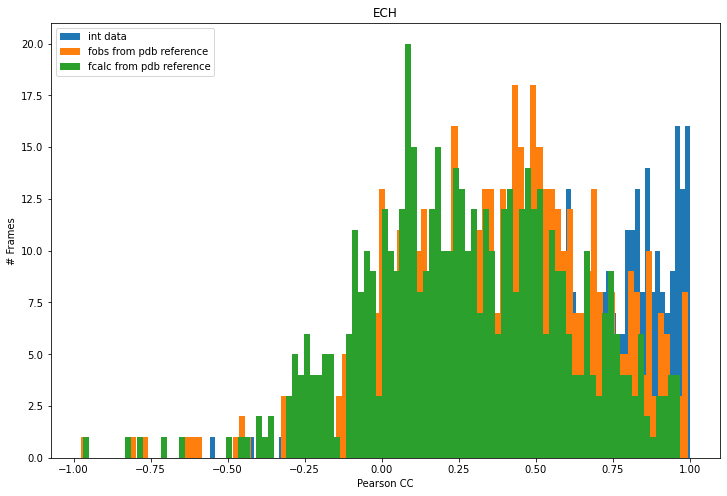

In [125]:
### ECH data 
_=plt.figure()
_.set_figwidth(12)
_.set_figheight(8)
_=plt.hist(tcorr4[:,0],bins=100,histtype="stepfilled", label="int data")
_=plt.hist(tcorr5[:,0],bins=100,histtype="stepfilled", label="fobs from pdb reference")
_=plt.hist(tcorr6[:,0],bins=100,histtype="stepfilled",label="fcalc from pdb reference")
_=plt.xlabel("Pearson CC")
_=plt.ylabel("# Frames")
_=plt.legend(loc='upper left')
_=plt.title("ECH")
_=plt.savefig("/das/work/p19/p19607/FromGreta/REDML_indx_data/ech/reference/ech.png")

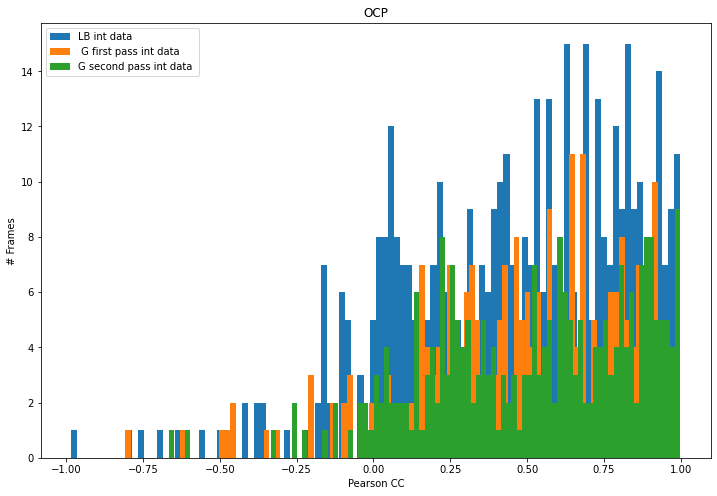

In [162]:
### OCP data 
_=plt.figure()
_.set_figwidth(12)
_.set_figheight(8)
_=plt.hist(tcorr10[:,0],bins=100,histtype="stepfilled", label="LB int data")
_=plt.hist(tcorr7[:,0],bins=100,histtype="stepfilled", label=" G first pass int data")
_=plt.hist(tcorr11[:,0],bins=100,histtype="stepfilled",label="G second pass int data ")
_=plt.xlabel("Pearson CC")
_=plt.ylabel("# Frames")
_=plt.legend(loc='upper left')
_=plt.title("OCP")
_=plt.savefig("/das/work/p19/p19607/FromGreta/REDML_indx_data/ocp/reference/ocp.png")

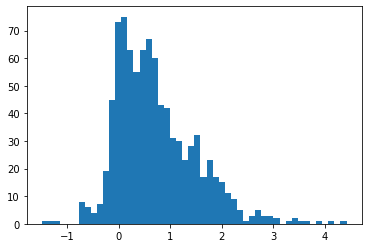

In [43]:
# plot the Fisher's transformation
_=plt.hist(np.arctanh(tcorr1[:,0]),bins=50)

## Get some weighted stats

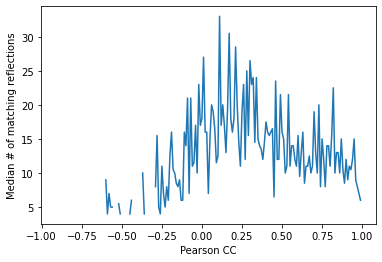

In [206]:
from scipy.stats import binned_statistic 

# get the binned stats
ii, rr, _ = binned_statistic(tcorr[:,0], tcorr[:,1] , statistic='median', 
                             bins= 200, range=(-1.,1))
_=plt.plot(rr[:-1],ii)
_=plt.xlabel("Pearson CC")
_=plt.ylabel("Median # of matching reflections")

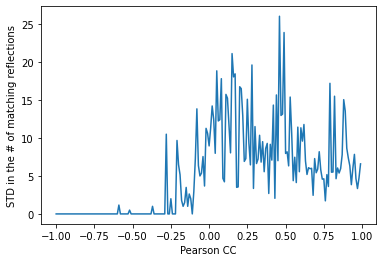

In [207]:
# get the binned stats
ii, rr, _ = binned_statistic(tcorr[:,0], tcorr[:,1] , statistic='std', 
                             bins= 200, range=(-1.,1))
plt.plot(rr[:-1],ii)
_=plt.xlabel("Pearson CC")
_=plt.ylabel("STD in the # of matching reflections")